# Lab 3 – Task 4: Shearing

Shearing tilts the image in a specified direction, slanting it along an axis.

**X-axis shear** (horizontal tilt):
$$T = \begin{bmatrix} 1 & m_x & 0 \\ 0 & 1 & 0 \end{bmatrix}$$

**Y-axis shear** (vertical tilt):
$$T = \begin{bmatrix} 1 & 0 & 0 \\ m_y & 1 & 0 \end{bmatrix}$$

where $m_x$ / $m_y$ are the shearing factors.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace path with 'lena.png' if available)
image = cv2.imread('../week-3_lab-1/pngimage.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]
print(f'Image shape: {image.shape}')

Image shape: (1000, 1000, 3)


## Original Example – X-axis Shear (m = 0.67)

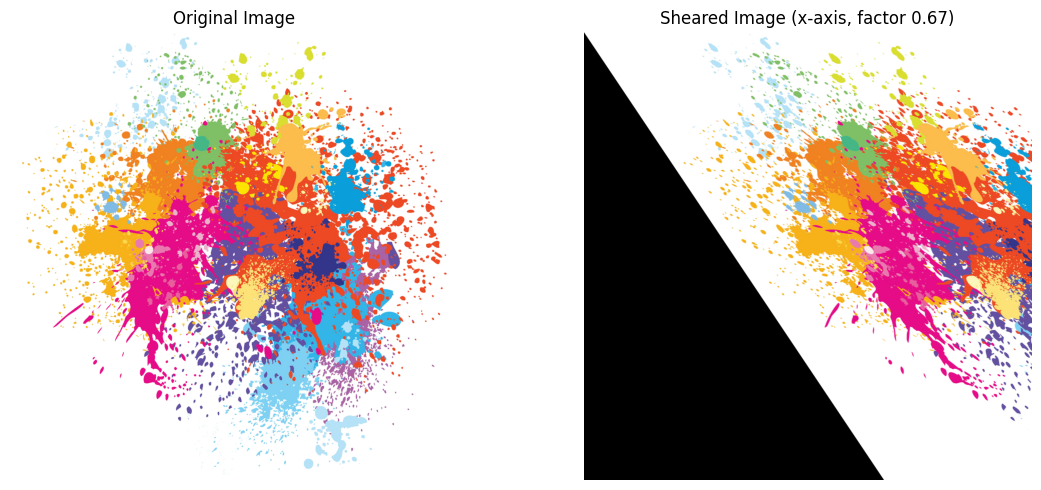

In [2]:
# Original example from the lab
m = 0.67
shearing_matrix = np.float32([[1, m, 0], [0, 1, 0]])
sheared_image = cv2.warpAffine(image, shearing_matrix, (w, h))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'Sheared Image (x-axis, factor {m})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Task 4.1 – X-axis Shearing with Different Factors

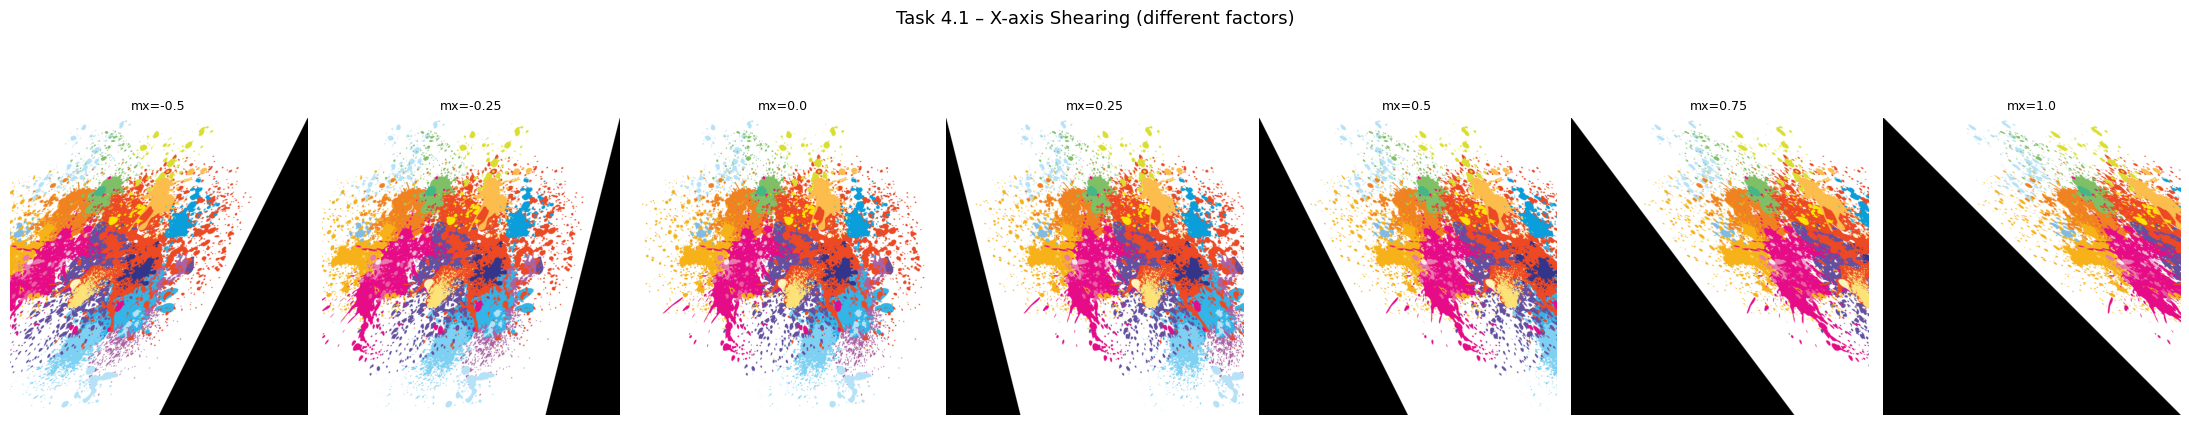

In [3]:
x_factors = [-0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]

fig, axes = plt.subplots(1, len(x_factors), figsize=(22, 5))

for idx, mx in enumerate(x_factors):
    M = np.float32([[1, mx, 0], [0, 1, 0]])
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f'mx={mx}', fontsize=9)
    axes[idx].axis('off')

plt.suptitle('Task 4.1 – X-axis Shearing (different factors)', fontsize=13)
plt.tight_layout()
plt.show()

## Task 4.1 – Y-axis Shearing with Different Factors

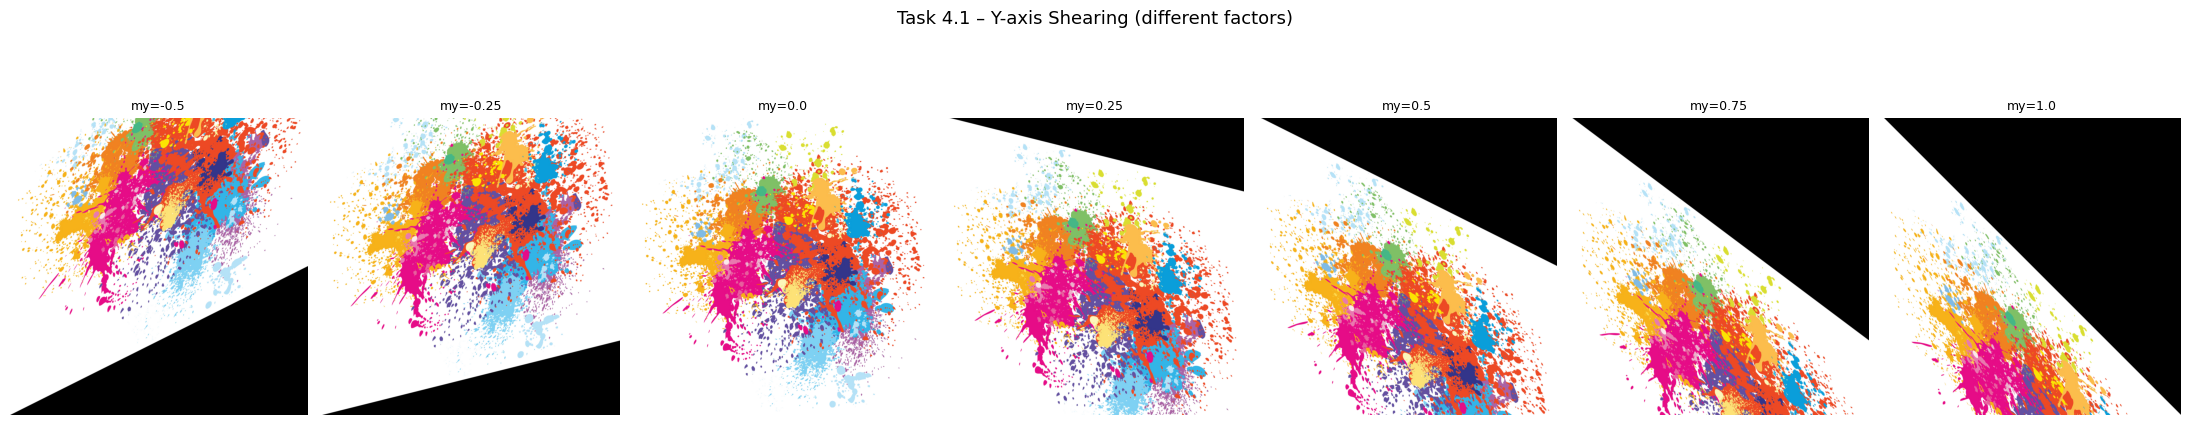

In [4]:
y_factors = [-0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]

fig, axes = plt.subplots(1, len(y_factors), figsize=(22, 5))

for idx, my in enumerate(y_factors):
    M = np.float32([[1, 0, 0], [my, 1, 0]])
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f'my={my}', fontsize=9)
    axes[idx].axis('off')

plt.suptitle('Task 4.1 – Y-axis Shearing (different factors)', fontsize=13)
plt.tight_layout()
plt.show()

## Task 4.1 – Combined X and Y Shearing

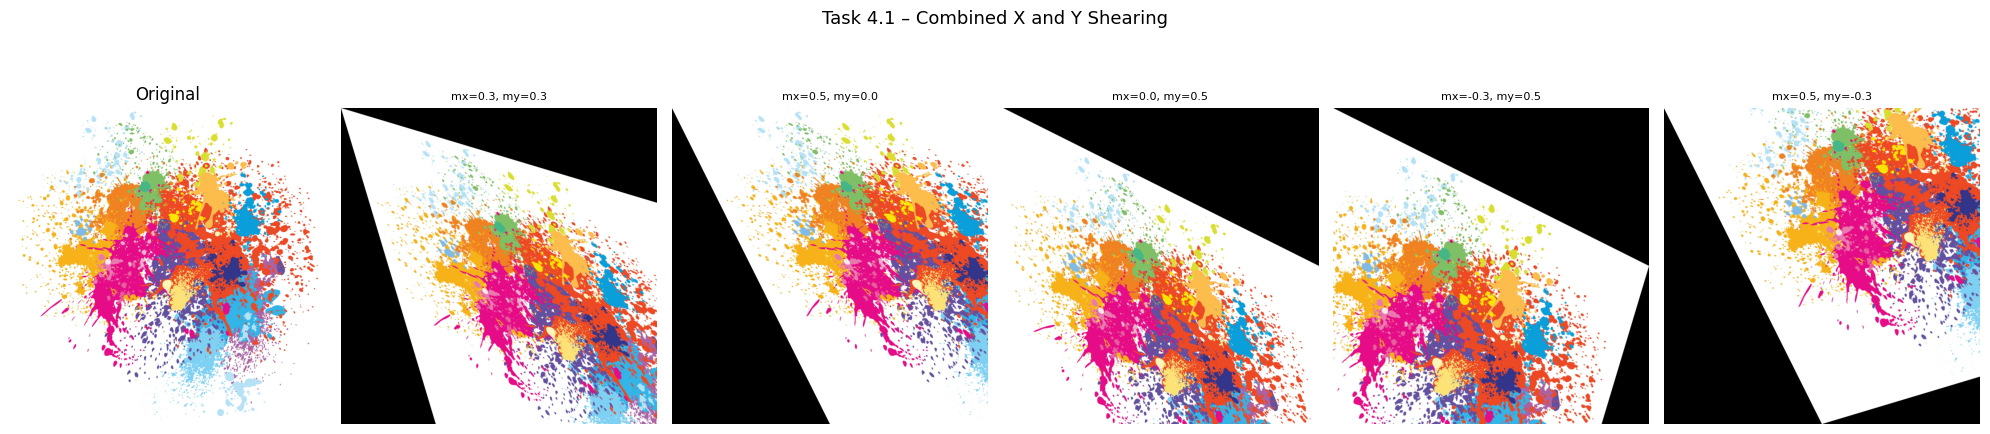

In [5]:
combos = [
    (0.3,  0.3,  'mx=0.3, my=0.3'),
    (0.5,  0.0,  'mx=0.5, my=0.0'),
    (0.0,  0.5,  'mx=0.0, my=0.5'),
    (-0.3, 0.5,  'mx=-0.3, my=0.5'),
    (0.5, -0.3,  'mx=0.5, my=-0.3'),
]

fig, axes = plt.subplots(1, len(combos) + 1, figsize=(20, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original')
axes[0].axis('off')

for idx, (mx, my, title) in enumerate(combos):
    M = np.float32([[1, mx, 0], [my, 1, 0]])
    result = cv2.warpAffine(image, M, (w, h))
    axes[idx + 1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[idx + 1].set_title(title, fontsize=8)
    axes[idx + 1].axis('off')

plt.suptitle('Task 4.1 – Combined X and Y Shearing', fontsize=13)
plt.tight_layout()
plt.show()

## Task 4.2 – Discussion: How Shearing Distorts the Image

### What shearing does geometrically

| Shear type | Effect |
|------------|--------|
| X-axis (`mx > 0`) | Columns are shifted to the **right** proportionally to their row index → image leans right |
| X-axis (`mx < 0`) | Columns shift left → image leans left |
| Y-axis (`my > 0`) | Rows are shifted **down** proportionally to their column index → image leans forward |
| Y-axis (`my < 0`) | Rows shift up → image leans backward |
| Combined | A parallelogram-like distortion in both directions simultaneously |

### Effect on proportions

- **Straight lines remain straight** (affine property), but **right angles are no longer preserved** — a square becomes a parallelogram.
- **Distances change**: vertical lengths appear compressed or stretched when viewed alongside the sheared axis.
- **Content is clipped**: because the output canvas size stays `w × h`, parts of the sheared image that extend beyond the boundary are cut off.
- **Large factors** cause severe slanting, leaving large black triangular regions on one side and clipping content on the other.
- Negative factors produce the same slant in the opposite direction.

### Practical uses
Shearing is used in **data augmentation** for deep learning (to teach models to recognise objects at different angles), in **italic font rendering**, and in **perspective correction** pipelines.